# Titanic - Machine Learning from Disaster

### <font color='blue'>*Author: Ali Chehrazi*</font>





## 1. Description
The objective of this project is to build a classification model to determine whether a passenger with a set of features survives or not. The data were obtained from the Kaggle competition on this problem. A CSV file called 'train.csv' with training data is given for model development.

<img src="Image/Titanic-1.jpg">

### About Dataset

The training dataset includes the information for 891 passengers and lists the following features:

- Survived: survival (1 for yes and 0 for no)
- Pclass: passenger socio-economic status (1 for 1st, 2 for 2nd and 3 for 3rd)
- Sex: female or male
- Age
- SibSp: number of siblings aboard
- Parch: number of parents and children aboard
- Ticket: ticket number
- Fare: passenger fare
- Cabin: cabin number
- Embarked: port of embarkation (C for Cherbourg, Q for Queenstown, and S for Southampton)

## 2. Importing Libraries
First, let's import the required libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Matplotlib is a plotting library for python
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
from sklearn.model_selection import train_test_split # Allows us to split our data into training and testing data
from sklearn.model_selection import GridSearchCV # Allows us to test parameters of classification algorithms and find the best one
from sklearn.linear_model import LogisticRegression # Logistic Regression classification algorithm
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbors classification algorithm
from sklearn.ensemble import RandomForestClassifier # Random Forest classification algorithm

## 3. Exploratory Data Analysis
Let's read train data and save them in a Panda DataFrame.

In [2]:
train_data=pd.read_csv("/content/train.csv")   #importing the train data and save it in a datafram

Let's see the first few rows of the dataset.

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's drop the PassengerID column and take a look at the statistics of the numerical variable.

In [4]:
train_data.drop("PassengerId", axis=1, inplace=True)

In [5]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's see the number of missing data in each column.

In [6]:
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

###Data Visualization
Let's look at some plots to evaluate the effect of different features.



#### Survival vs. Sex
First, let's check the effect of gender on the survival rate.

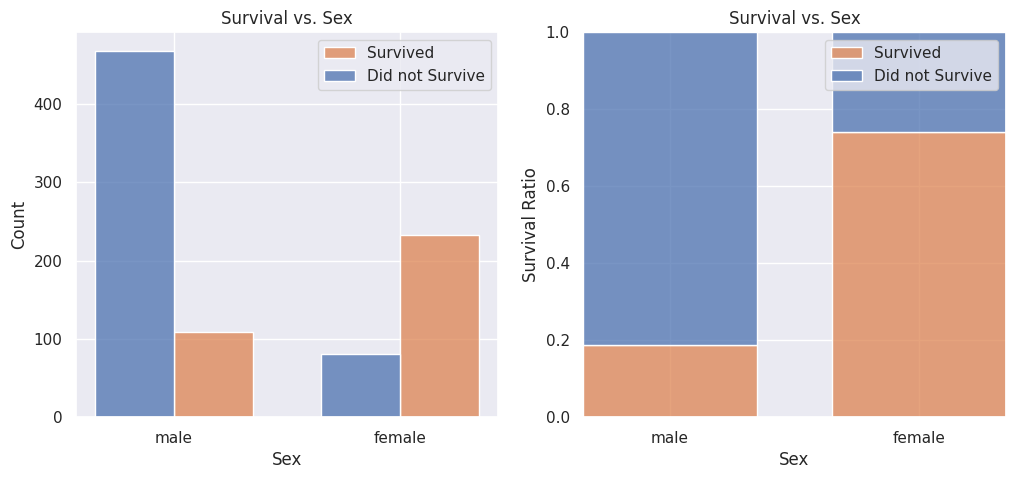

In [7]:
sns.set()

fig, axes = plt.subplots(1, 2, figsize=(12,5))

ax1=sns.histplot(train_data, x="Sex", hue="Survived", multiple="dodge", shrink=0.7, legend=False, ax=axes[0], discrete=True)
ax1.set(ylabel="Count", title ='Survival vs. Sex')
ax1.legend(labels=['Survived', 'Did not Survive'])

ax2=sns.histplot(train_data, x="Sex", hue="Survived", multiple="fill", shrink=0.7, legend=False, ax=axes[1], discrete=True)
ax2.set(ylabel="Survival Ratio", title ='Survival vs. Sex')
legend=ax2.legend(labels=['Survived', 'Did not Survive'])

Looking at this figure, it can be seen that sex was a very influential factor in survival. The survival rate for females was considerably higher than for males. The following calculation shows the exact ratio which is **~0.742** for women and **~0.189** for men.

In [8]:
Female_ratio=sum((train_data["Sex"]=="female") & (train_data["Survived"]==1))/sum((train_data["Sex"]=="female"))
print("The survival ratio for females is "+ str(Female_ratio)[0:5]+".")

Male_ratio=sum((train_data["Sex"]=="male") & (train_data["Survived"]==1))/sum((train_data["Sex"]=="male"))
print("The survival ratio for males is "+ str(Male_ratio)[0:5]+".")

The survival ratio for females is 0.742.
The survival ratio for males is 0.188.


#### Survival vs. Passenger Class (Pclass)

Let's check the effect of passenger class on the survival rate. The passenger class is based on socio-economic measures.

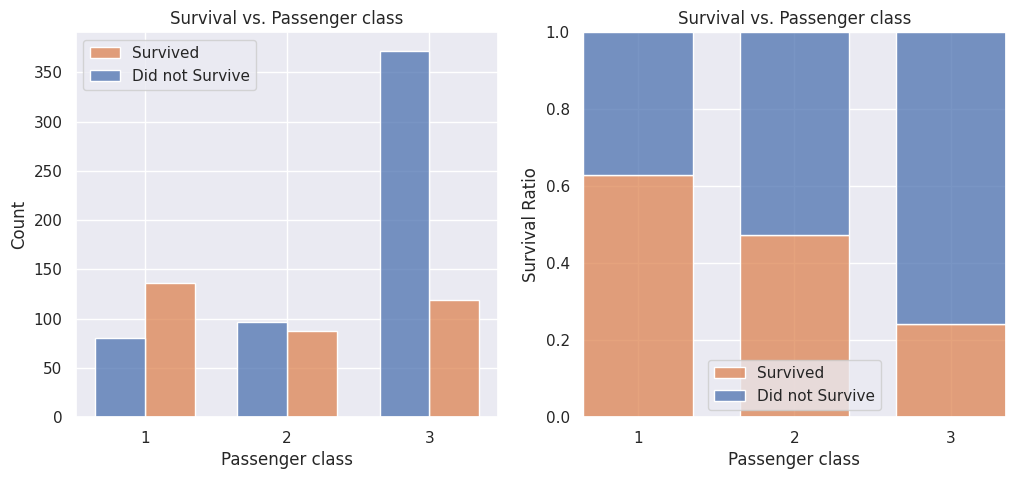

In [9]:
sns.set()

fig, axes = plt.subplots(1, 2, figsize=(12,5))

ax1=sns.histplot(train_data, x="Pclass", hue="Survived", multiple="dodge", shrink=0.7, legend=False, ax=axes[0], discrete=True)
ax1.set(xlabel='Passenger class', ylabel="Count", title ='Survival vs. Passenger class')
ax1.legend(labels=['Survived', 'Did not Survive'])
ax1.set_xticks([1,2,3])

ax2=sns.histplot(train_data, x="Pclass", hue="Survived", multiple="fill", shrink=0.7, legend=False, ax=axes[1], discrete=True)
ax2.set(xlabel='Passenger class', ylabel="Survival Ratio", title ='Survival vs. Passenger class')
ax2.legend(labels=['Survived', 'Did not Survive'])
ax2=ax2.set_xticks([1,2,3])

A very clear relation can be seen between the passenger class and the survival ratio. Passengers with a higher class (Class 1 is higher), had a higher probability of survival.

#### Survival vs. Fare

Let's check the effect of Fare on the survival rate.

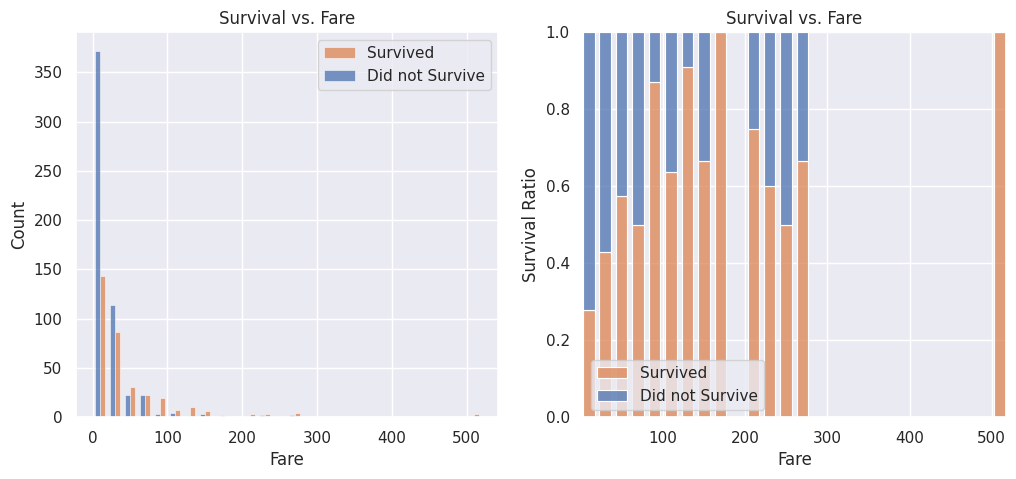

In [10]:
sns.set()

fig, axes = plt.subplots(1, 2, figsize=(12,5))

ax1=sns.histplot(train_data, x="Fare", hue="Survived", multiple="dodge", shrink=0.7, legend=False, ax=axes[0], binwidth=20)
ax1.set(ylabel="Count", title ='Survival vs. Fare')
ax1.legend(labels=['Survived', 'Did not Survive'])

ax2=sns.histplot(train_data, x="Fare", hue="Survived", multiple="fill", shrink=0.7, legend=False, ax=axes[1], binwidth=20)
ax2.set(ylabel="Survival Ratio", title ='Survival vs. Fare')
ax2=ax2.legend(labels=['Survived', 'Did not Survive'])

Looking at this figure, it can be seen that passengers that paid a higher price had a higher chance of survival. Let's look at Fare vs. Passenger class to see if a higher Fare is always associated with a higher class.

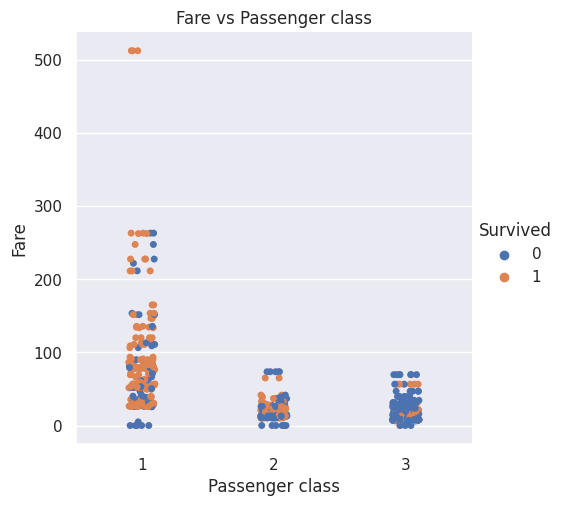

In [11]:
ax1=sns.catplot(train_data, x="Pclass", y="Fare", hue="Survived")
ax1=ax1.set(xlabel='Passenger class', title ='Fare vs Passenger class')

Interesting information can be seen in this figure. While all the high ticket prices (>80) were paid by the passengers in Class 1. Some passengers in Class 1 paid lower prices in comparison with some passengers in Classes 2 and 3. Especially, it can be seen that some passengers in Class 1, paid 0 and they did not survive. They could be the crew of the ship. Overall, it can be argued that ticket price is a good classifier to be included independent from passenger class.

#### Embarked point vs. Fare

Let's check the effect of Embarked point on the survival rate.

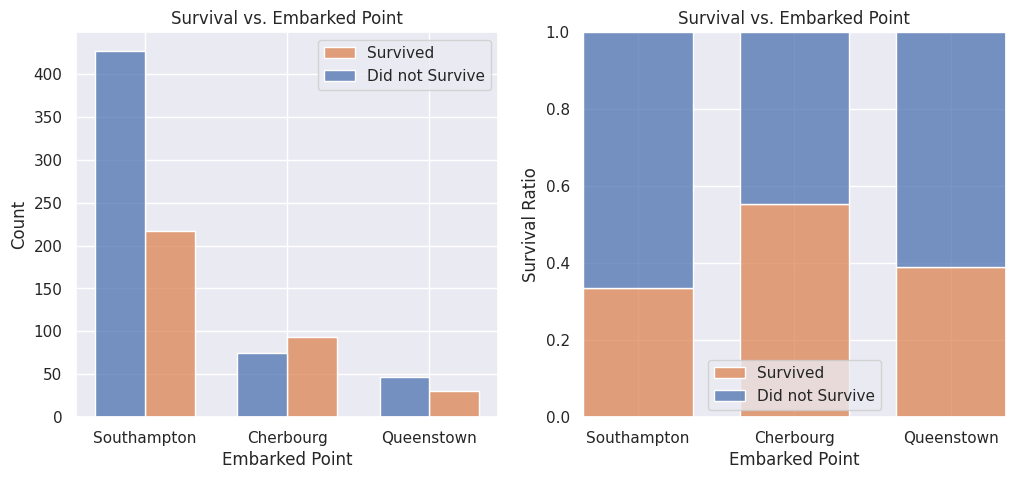

In [12]:
sns.set()

fig, axes = plt.subplots(1, 2,figsize=(12,5))

ax1=sns.histplot(train_data, x="Embarked", hue="Survived", multiple="dodge", shrink=0.7, ax=axes[0], legend=False)
ax1.set(xlabel ="Embarked Point", title ='Survival vs. Embarked Point')
ax1.legend(labels=['Survived', 'Did not Survive'])
ax1.set_xticks(["S","C","Q"]) #C for Cherbourg, Q for Queenstown, and S for Southampton)
xticklabels=ax1.set_xticklabels(["Southampton","Cherbourg","Queenstown"])


ax2=sns.histplot(train_data, x="Embarked", hue="Survived", multiple="fill", shrink=0.7, legend=False, ax=axes[1], discrete=True)
ax2.set(xlabel='Embarked Point',ylabel="Survival Ratio", title ='Survival vs. Embarked Point')
ax2.legend(labels=['Survived', 'Did not Survive'])
ax2.set_xticks(["S","C","Q"]) #C for Cherbourg, Q for Queenstown, and S for Southampton)
xticklabels=ax2.set_xticklabels(["Southampton","Cherbourg","Queenstown"])



This figure shows Embarked point can affect the survival rate. Passengers from Southampton had a lower chance of survival. Let's see if this is due to the class of the passengers.

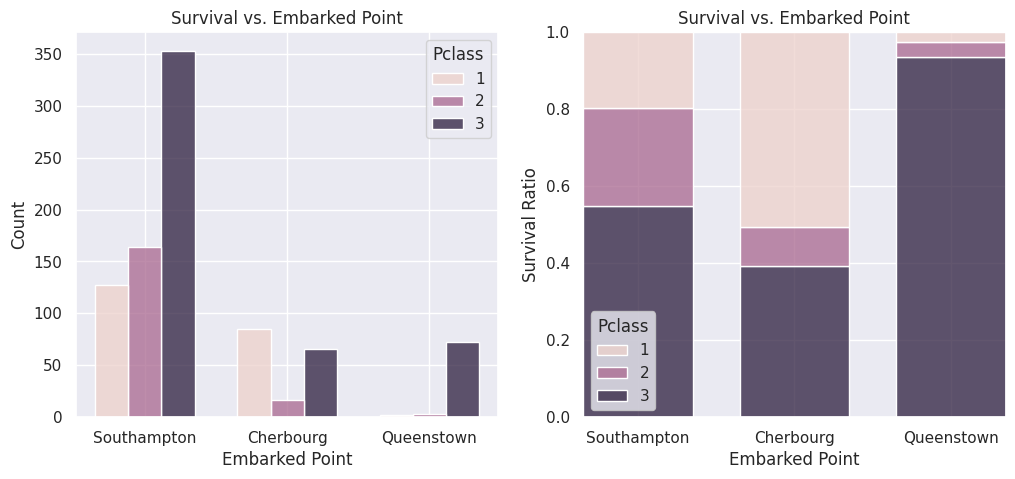

In [13]:
sns.set()

fig, axes = plt.subplots(1, 2,figsize=(12,5))

ax1=sns.histplot(train_data, x="Embarked", hue="Pclass", multiple="dodge", shrink=0.7, ax=axes[0])
ax1.set(xlabel ="Embarked Point", title ='Survival vs. Embarked Point')
ax1.set_xticks(["S","C","Q"]) #C for Cherbourg, Q for Queenstown, and S for Southampton)
xticklabels=ax1.set_xticklabels(["Southampton","Cherbourg","Queenstown"])


ax2=sns.histplot(train_data, x="Embarked", hue="Pclass", multiple="fill", shrink=0.7, ax=axes[1], discrete=True)
ax2.set(xlabel='Embarked Point',ylabel="Survival Ratio", title ='Survival vs. Embarked Point')
ax2.set_xticks(["S","C","Q"]) #C for Cherbourg, Q for Queenstown, and S for Southampton)
xticklabels=ax2.set_xticklabels(["Southampton","Cherbourg","Queenstown"])

It can be seen that the ratio of Class 1 passengers is higher for Cherbourg. Therefore, this can be an explanation for the higher survival ratio of passengers from this port. However, most of the Queenstown passengers are from Class 3 but their survival rate is higher than Southampton. Therefore, it can be argued that including this feature in the classification model is viable as it is not completely correlated to the passenger class.

#### Survival vs. Age

Let's see the effect of age on survival rate.

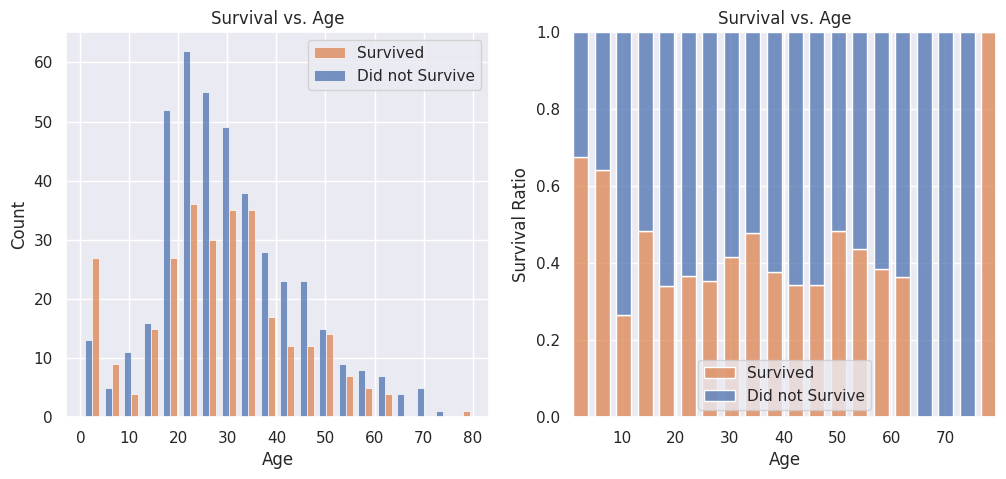

In [14]:
sns.set()

fig, axes = plt.subplots(1, 2,figsize=(12,5))

ax1=sns.histplot(train_data, x="Age", hue="Survived", multiple="dodge", shrink=0.7, ax=axes[0], legend=False)
ax1.set(title ='Survival vs. Age')
ax1.legend( labels=['Survived', 'Did not Survive'])

ax2=sns.histplot(train_data, x="Age", hue="Survived", multiple="fill", shrink=0.7, ax=axes[1], legend=False)
ax2.set(ylabel="Survival Ratio", title ='Survival vs. Age')
legend=ax2.legend( labels=['Survived', 'Did not Survive'])


It can be seen that the passengers with lower age(<10 years) had a higher chance of survival. Let's see the effect of age on each gender.

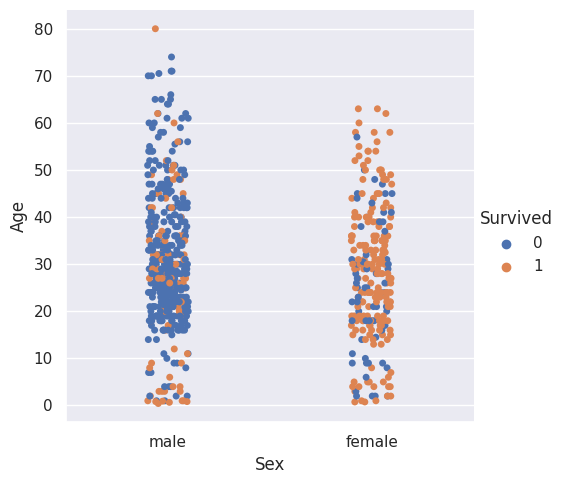

In [15]:
ax1=sns.catplot(train_data, x="Sex", y="Age", hue="Survived")

Interesting information can be seen in this figure. Looking at the data for males, it can be seen that the survival ratio is higher for children below 10 in comparison with any other age group. Looking at the data for females, it can be seen that woman over 50 has a very high chance of survival. Also, interestingly, it seems that being a child in the female group is not associated with a considerably higher survival rate in comparison with other female age groups.

Survival vs. # of Siblings

Let's see the effect of the number of siblings aboard.

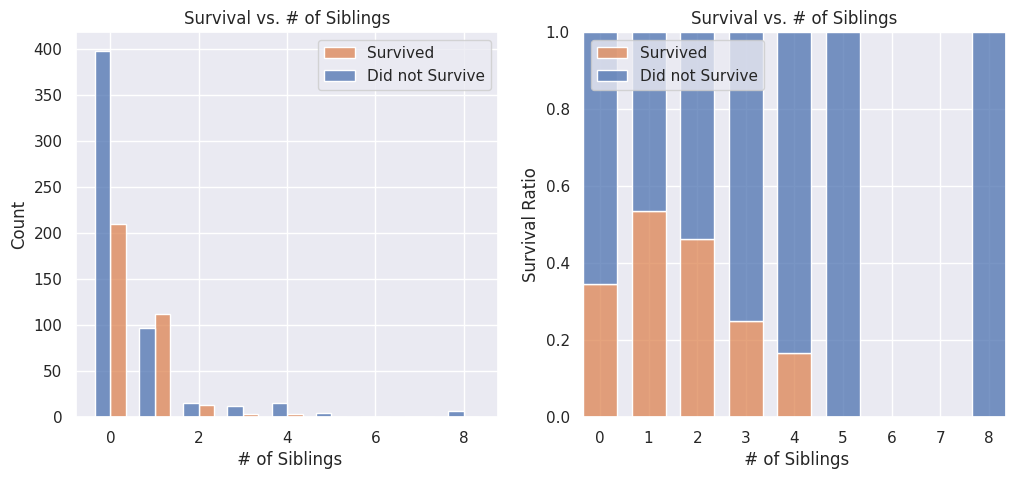

In [16]:
fig, axes = plt.subplots(1, 2,figsize=(12,5))

ax1=sns.histplot(train_data, x="SibSp", hue="Survived", multiple="dodge", shrink=0.7, ax=axes[0], legend=False, discrete=True)
ax1.set(xlabel=" # of Siblings", title ='Survival vs. # of Siblings')
ax1.legend( labels=['Survived', 'Did not Survive'])

ax2=sns.histplot(train_data, x="SibSp", hue="Survived", multiple="fill", shrink=0.7, ax=axes[1], legend=False, discrete=True)
ax2.set(xlabel=" # of Siblings",ylabel="Survival Ratio", title ='Survival vs. # of Siblings')
legend=ax2.legend( labels=['Survived', 'Did not Survive'])


It can be seen that people with one or two siblings had a higher survival rate in comparison with other people.

Survival vs. # of Parents/Children

Let's see the effect of the number of siblings aboard.

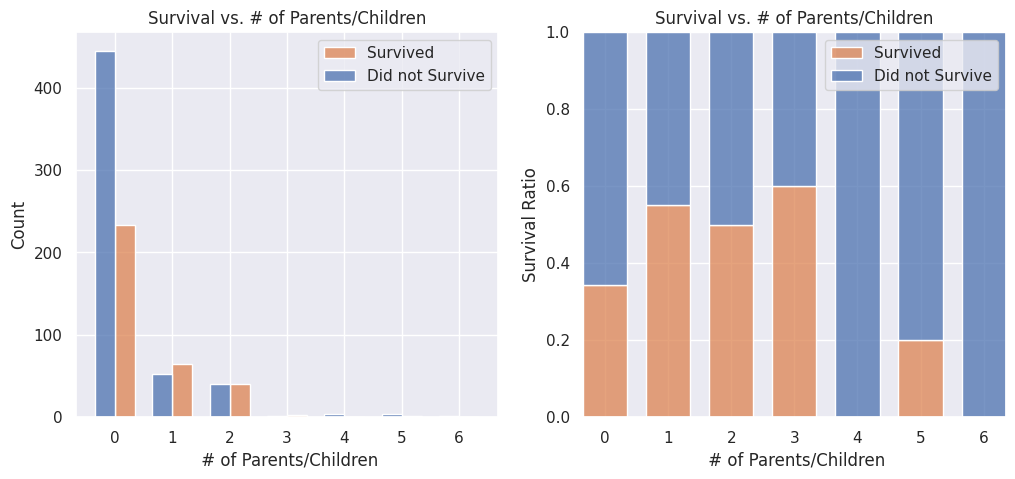

In [17]:
fig, axes = plt.subplots(1, 2,figsize=(12,5))

ax1=sns.histplot(train_data, x="Parch", hue="Survived", multiple="dodge", shrink=0.7, ax=axes[0], legend=False, discrete=True)
ax1.set(xlabel=" # of Parents/Children", title ='Survival vs. # of Parents/Children')
ax1.legend( labels=['Survived', 'Did not Survive'])

ax2=sns.histplot(train_data, x="Parch", hue="Survived", multiple="fill", shrink=0.7, ax=axes[1], legend=False, discrete=True)
ax2.set(xlabel=" # of Parents/Children",ylabel="Survival Ratio", title ='Survival vs. # of Parents/Children')
legend=ax2.legend( labels=['Survived', 'Did not Survive'])

It can be seen that people with 1-3 parents/children aboard had a higher survival rate.

## 4. Preprocessing training data

Based on the data visualization, it seems that Age and Embarking points can be valuable features for model development. Therefore, let's start with filling in the missing values for these features.



### "Embarked" Column
Only 2 passengers don't have Embarked point information. Therefore, let's fill in the missing values with the mode which is S (or Southampton).



In [18]:
features=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X=train_data[features].copy()
X["Embarked"]=X["Embarked"].fillna("S")

### "Age" Column

Filling the missing values in the "Age" column is more challenging. Let's focus on the title of the passengers and fill in the missing age with the average value of the people with the same title.

Let's check the unique title of the people in the database.


In [19]:
from collections import defaultdict #With defaultdict, can get a defacult value for each item.

Names_title=train_data["Name"].copy() #Get a copy of column Name
titles=defaultdict(lambda:0)  #titles is a dictionary that returns 0 and makes a new key and a value of 0 for that key, when the key is not in the dictionary.

i=0
for name in Names_title:
  title=name[name.find(",")+2:name.find(".")] # the title is mentioned after "," and ends before "."
  titles[title]+=1 # the dictionary value for each title will be updated in this step.
  Names_title[i]=title # titles for each passenger will be saved in this array.
  i+=1

print("the number of passengers with titles is "+ str(sum(titles.values())))
title_array=Names_title.copy()
titles

the number of passengers with titles is 891


defaultdict(<function __main__.<lambda>()>,
            {'Mr': 517,
             'Mrs': 125,
             'Miss': 182,
             'Master': 40,
             'Don': 1,
             'Rev': 6,
             'Dr': 7,
             'Mme': 1,
             'Ms': 1,
             'Major': 2,
             'Lady': 1,
             'Sir': 1,
             'Mlle': 2,
             'Col': 2,
             'Capt': 1,
             'the Countess': 1,
             'Jonkheer': 1})

Now, let's make a mapping dictionary to get rid of rare titles; basically, let's replace them with one popular title.

In [20]:
title_map={'Mr':{'Mr'},'lord':{'Sir','Rev','Don','Dr','Lady','the Countess','Jonkheer'},'Crew':{'Capt','Col','Major'},'Mrs':{'Ms','Mrs','Mme'},'Miss':{'Mis','Mlle'}}

In [21]:
for item in title_map:
  for title in title_map[item]:
    title_array[title_array==title]=item

title_dict=defaultdict(lambda:0)
for title in title_array:
  title_dict[title]+=1
title_dict

defaultdict(<function __main__.<lambda>()>,
            {'Mr': 517,
             'Mrs': 127,
             'Miss': 184,
             'Master': 40,
             'lord': 18,
             'Crew': 5})

Now, let's fill in the Nan ages for each person with the average age of the people with the same title.



In [22]:
Age_array=train_data["Age"].copy()
for title in title_dict:
  Age_array[(Age_array.isna()) & (title_array==title)]=Age_array[(title_array==title)].mean()
X.loc[:,"Age"]=Age_array
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### "Age and Fare grouping"
Let's group the values in Age and Fare columns.

In [23]:
Index=X.copy()

for i in range(15):
    X.iloc[(Index["Age"]>=10*i) & (Index["Age"]<10*(i+1)),2]=i+1


for i in range(60):
    X.iloc[(Index["Fare"]>=10*i) & (Index["Fare"]<10*(i+1)),5]=i+1

X.isna().sum()
X = pd.get_dummies(X)

## 5. Classification Models

Let's use three famous classification models, Logistic Regression, KNN, and Random Forest.




### Logistic Regression

In [24]:
y = train_data["Survived"]

X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

parameters ={"C":[0.01,0.1,1,10,100],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy:",logreg_cv.best_score_)
print("accuracy test set:",logreg_cv.score(X_test,Y_test))

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.7992175273865415
accuracy test set: 0.7932960893854749


### KNN

In [25]:
parameters = {'n_neighbors': [i for i in range(1,22)],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()
knn_cv=GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
knn_cv.score(X_test,Y_test)
print("accuracy test set:",knn_cv.score(X_test,Y_test))

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 18, 'p': 1}
accuracy : 0.8230829420970267
accuracy test set: 0.8212290502793296


### Random Forest

In [26]:
parameters = {'n_estimators': [100,1000],
              'max_depth': [3,5]}
RF = RandomForestClassifier()
RF_cv=GridSearchCV(RF,parameters,cv=10)
RF_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",RF_cv.best_params_)
print("accuracy :",RF_cv.best_score_)
RF_cv.score(X_test,Y_test)
print("accuracy test set:",RF_cv.score(X_test,Y_test))

tuned hpyerparameters :(best parameters)  {'max_depth': 5, 'n_estimators': 1000}
accuracy : 0.8315336463223787
accuracy test set: 0.8156424581005587


Let's Compare the cross-validation score and test set score of different models.


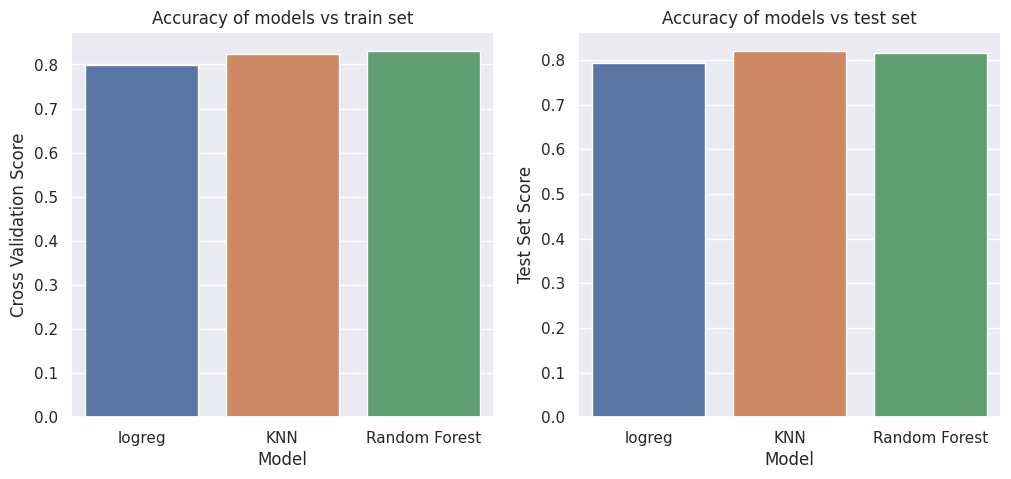

In [27]:
models=["logreg","KNN","Random Forest"]
CV_Scores=[logreg_cv.best_score_,knn_cv.best_score_,RF_cv.best_score_]
Test_Scores=[logreg_cv.score(X_test,Y_test),knn_cv.score(X_test,Y_test),RF_cv.score(X_test,Y_test),]

fig, axes = plt.subplots(1, 2,figsize=(12,5))

ax1=sns.barplot(x=models, y=CV_Scores, ax=axes[0])
ax1.set(xlabel="Model",ylabel="Cross Validation Score", title ='Accuracy of models vs train set')

ax2=sns.barplot(x=models, y=Test_Scores, ax=axes[1])
ax2=ax2.set(xlabel="Model",ylabel="Test Set Score", title ='Accuracy of models vs test set')


Looking at the results, it can be seen that all the models have a score of around ~0.8. It can be seen that the performance of Random Forest and KNN is very similar on the test set. However, the score of logistic regression is slightly lower.